findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


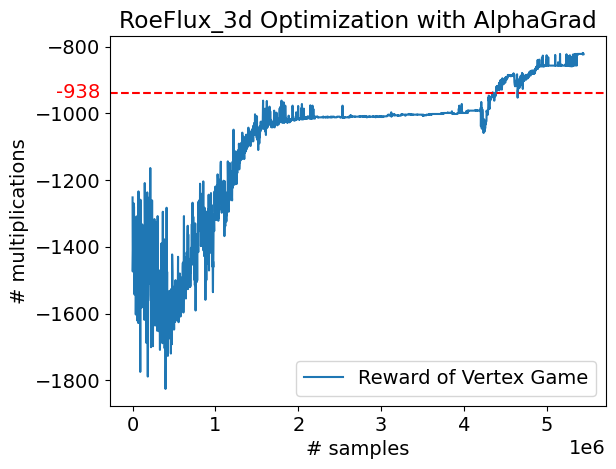

In [1]:
import jax
import jax.numpy as jnp

import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 14}

plt.rc('font', **font)


data = np.genfromtxt("RoeFlux_3d_A0_good_run.csv", delimiter=",", skip_header=1)
num_samples = data[:2520, 0]*16*135
num_muls = data[:2520, 1]

fig, ax = plt.subplots()
ax.plot(num_samples, num_muls, label="Reward of Vertex Game")
ax.axhline(y=-938., color='r', linestyle='--')
ax.set_xlabel("# samples")
ax.set_ylabel("# multiplications")
ax.set_title("RoeFlux_3d Optimization with AlphaGrad")

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,-938., "{:.0f}".format(-938.), color="red", transform=trans, 
        ha="right", va="center")
ax.legend(loc="lower right")

In [2]:
import graphax
from graphax import jacve
from graphax.perf import plot_performance
from graphax.examples import RoeFlux_3d

In [3]:
# 819 mults
order = [47, 137, 135, 126, 128, 51, 28, 12, 52, 23, 110, 106, 105, 113, 112, 
         74, 117, 134, 78, 86, 41, 96, 2, 121, 75, 100, 53, 116, 124, 90, 130, 
         67, 120, 80, 136, 108, 33, 119, 123, 111, 77, 118, 8, 109, 55, 89, 48, 
         65, 127, 132, 138, 38, 79, 114, 39, 54, 143, 20, 102, 22, 45, 98, 62, 
         71, 141, 125, 36, 69, 68, 107, 56, 9, 19, 32, 64, 101, 57, 104, 6, 95, 
         76, 129, 122, 40, 103, 145, 61, 50, 16, 13, 115, 60, 139, 70, 73, 131, 
         37, 140, 14, 72, 49, 43, 18, 59, 81, 10, 7, 11, 87, 99, 133, 34, 84, 
         85, 92, 91, 94, 97, 66, 83, 93, 3, 46, 24, 15, 4, 42, 27, 82, 58, 29, 
         63, 35, 21, 30, 5, 88, 26, 17, 44, 1, 31, 25]

mM_order = [81, 82, 90, 91, 4, 5, 9, 10, 12, 14, 21, 22, 23, 24, 30, 31, 32, 33, 
            39, 41, 45, 47, 48, 54, 55, 59, 75, 78, 80, 84, 89, 93, 126, 129, 
            132, 133, 3, 6, 25, 28, 34, 37, 40, 42, 49, 56, 58, 62, 64, 65, 67, 
            71, 74, 77, 85, 87, 94, 96, 98, 99, 100, 101, 102, 104, 105, 107, 
            109, 110, 112, 114, 116, 117, 119, 121, 123, 125, 127, 130, 134, 
            136, 138, 26, 29, 35, 38, 46, 57, 61, 68, 72, 83, 88, 92, 97, 111, 
            118, 124, 131, 137, 141, 11, 19, 20, 50, 53, 60, 70, 103, 106, 113, 
            120, 135, 86, 95, 13, 15, 43, 52, 66, 128, 145, 69, 73, 18, 139, 27, 
            36, 140, 108, 122, 115, 1, 51, 76, 79, 63, 2, 44, 16, 7, 8, 143, 17] 

In [15]:
batchsize = 256
ul0 = jnp.array([.1])
ul = jnp.array([.1, .2, .3])
ul4 = jnp.array([.5])
ur0 = jnp.array([.2])
ur = jnp.array([.2, .2, .4])
ur4 = jnp.array([.6])
xs = (ul0, ul, ul4, ur0, ur, ur4)
xs = [jnp.tile(x[jnp.newaxis, ...], (batchsize, 1)) for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
jax.vmap(RoeFlux_3d)(*xs)

(Array([[0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0.21035519],
        [0

  0%|          | 0/1000 [00:00<?, ?it/s]

1 : 2048
2 : 1536
3 : 786432
4 : 393216
5 : 393216
6 : 512
SparseTensor: 
   shape = (256, 3, 256, 3),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=3, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=3, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[256,3])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (256, 3, 256, 3),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=3, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=3, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[256,3])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1, 1] [1, 1] (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(

  0%|          | 0/1000 [00:00<?, ?it/s]

145 : 512
143 : 1536
141 : 512
140 : 0
139 : 512
138 : 512
137 : 512
136 : 512
135 : 512
134 : 512
133 : 0
132 : 256
131 : 512
130 : 512
129 : 256
128 : 512
127 : 512
126 : 256
125 : 512
SparseTensor: 
   shape = (256, 1, 256, 1),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[256,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (256, 1, 256, 1),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[256,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_

  0%|          | 0/1000 [00:00<?, ?it/s]

81 : 0
82 : 0
90 : 0
91 : 0
4 : 0
5 : 0
9 : 256
10 : 256
12 : 768
14 : 768
21 : 768
22 : 768
23 : 0
24 : 768
30 : 768
31 : 768
32 : 0
33 : 768
39 : 256
41 : 256
45 : 768
47 : 0
48 : 256
54 : 256
55 : 0
59 : 0
75 : 256
78 : 256
80 : 0
84 : 0
89 : 0
93 : 0
126 : 256
129 : 256
132 : 256
133 : 0
3 : 0
6 : 512
25 : 1024
28 : 512
34 : 1024
37 : 512
40 : 512
42 : 512
49 : 512
56 : 512
58 : 1536
62 : 512
SparseTensor: 
   shape = (256, 1, 256, 3),
   out_dims = (DenseDimension(id=0, size=256, val_dim=0), DenseDimension(id=1, size=1, val_dim=1)),
   primal_dims = (DenseDimension(id=2, size=256, val_dim=2), DenseDimension(id=3, size=3, val_dim=3)),
   val = Traced<ShapedArray(float32[256,1,256,3])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (256, 1, 256, 3),
   out_dims = (DenseDimension(id=0, size=256, val_dim=0), DenseDimension(id=1, size=1, val_dim=1)),
   primal_dims = (DenseDimension(id=2, size=256, val_dim=2), DenseDimension

  0%|          | 0/1000 [00:00<?, ?it/s]

47 : 0
137 : 512
135 : 512
126 : 256
128 : 512
51 : 1280
28 : 512
12 : 768
52 : 1536
23 : 0
110 : 512
106 : 512
105 : 512
113 : 512
112 : 512
74 : 512
117 : 512
134 : 512
78 : 256
86 : 1536
41 : 256
96 : 512
2 : 1536
121 : 512
75 : 512
100 : 512
53 : 1024
SparseTensor: 
   shape = (256, 1, 256, 1),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<ShapedArray(float32[256,1])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (256, 1, 256, 1),
   out_dims = (SparseDimension(id=0, size=256, val_dim=0, other_id=2), SparseDimension(id=1, size=1, val_dim=1, other_id=3)),
   primal_dims = (SparseDimension(id=2, size=256, val_dim=0, other_id=0), SparseDimension(id=3, size=1, val_dim=1, other_id=1)),
   val = Traced<Sh

100%|██████████| 1000/1000 [00:17<00:00, 56.51it/s]


fwd mean: 12.900418281555176, rev mean: 23.05411720275879, mM_mean: 20.69701385498047, cc_mean: 16.38632583618164
fwd err: [-1.5344257  0.8427572], rev err: [-1.1544819  1.3409328], mM_std: [-2.341261   1.9344845], cc_std: [-1.3789148  1.3594418]
[[1.5344257 1.1544819 2.341261  1.3789148]
 [0.8427572 1.3409328 1.9344845 1.3594418]] (2, 4)


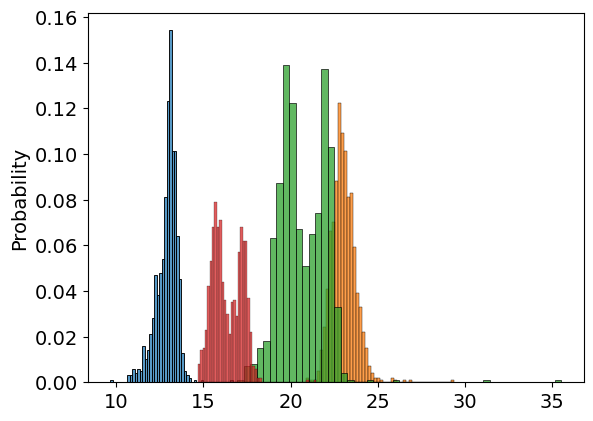

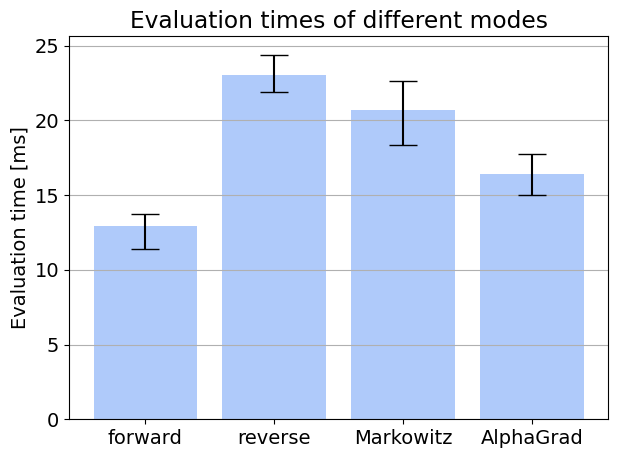

In [16]:
plot_performance(RoeFlux_3d, xs, order, mM_order, "./RoeFlux_3d.png", samplesize=1000)

### The best
fwd mean: 3.8236873149871826, rev mean: 3.6495230197906494, cc_mean: 2.9825470447540283, mM_mean: 3.825319290161133
fwd std: 0.2087354212999344, rev std: 0.39476415514945984, cc_std: 0.6004145741462708, mM_std: 0.47684094309806824

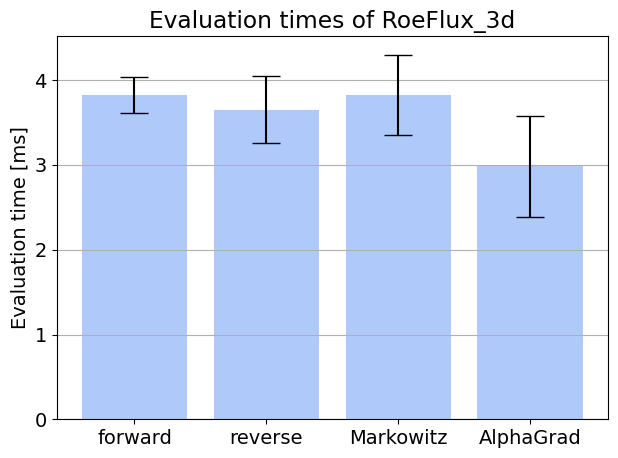

In [6]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of RoeFlux_3d")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()